---
title: cheg304 homework 1 question 2
author: anon for grading??
date: today
format: 
    html:
        self-contained: true
---

In [2]:
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

data = pd.read_excel('Chapter1.xlsx', sheet_name='Table1.1')
mu_a, std_a = data['YA'].values.mean(), data['YA'].values.std(ddof=1)

print(f'cat. a -- mean: {mu_a:.2f}  std: {std_a:.2f}')
print()

a_50 = randn(50) * std_a + mu_a

print('cat. a random nums \n', a_50)

cat. a -- mean: 75.52  std: 1.43

cat. a random nums 
 [77.01957719 75.46833371 75.73472765 74.0790128  74.43090738 76.65803062
 78.46982658 76.7959939  75.36523568 74.83021324 76.07376662 77.03575249
 74.55132423 75.94528457 74.89613537 76.9123538  76.57467104 76.74736489
 77.17691074 75.47998318 73.95448293 76.64329145 76.33783652 78.05274621
 74.24249857 69.35608472 75.88844639 76.42016475 76.13952957 79.83682622
 75.31774711 77.47137879 76.76903632 74.66264696 74.68169896 75.42498748
 76.05624425 77.24785276 73.01551811 75.38032352 76.53464234 77.17014132
 76.06005473 74.13485833 74.81191351 76.15762766 76.3692699  73.85265979
 72.59715647 75.35043947]


In [3]:
random_mu_a, random_std_a = a_50.mean(), a_50.std(ddof=1) # ddof=1 since sample standard deviation !!!

print(f'cat. a -- mean: {random_mu_a:.2f}  std: {random_std_a:.2f}')

cat. a -- mean: 75.72  std: 1.65


mean and standard deviation are close but not the same since the parameters from the original 50 were calculated and then used in a distribution function to generate a different set of 50 pseudoraneom numbers. they won't be the same as anyone else who does this assignment since the random sampling is based on whatever random seed is used (since random numbers in coding really come from an algorithm). since different people used different seeds (`rng shuffle` for the matlab bots people) the numbers used in the calculations should be diff and therefore the results should be different

recreating table 1.3 first

In [4]:
bins = np.arange(71.5,80.5,1)
binned_data = pd.cut(a_50, bins, retbins=False)

table13 = pd.DataFrame(a_50, binned_data).reset_index()
table13 = table13.groupby('index', observed=False).count()
table13['frequency'] = table13[0]
table13['relative frequency'] = np.round(table13[0] / table13[0].sum(),2)
table13.drop(columns=[0])

,frequency,relative frequency
index,,
"(71.5, 72.5]",0,0.00
"(72.5, 73.5]",2,0.04
"(73.5, 74.5]",6,0.12
"(74.5, 75.5]",13,0.27
"(75.5, 76.5]",11,0.23
"(76.5, 77.5]",14,0.29
"(77.5, 78.5]",2,0.04
"(78.5, 79.5]",0,0.00


and now recreating the figure

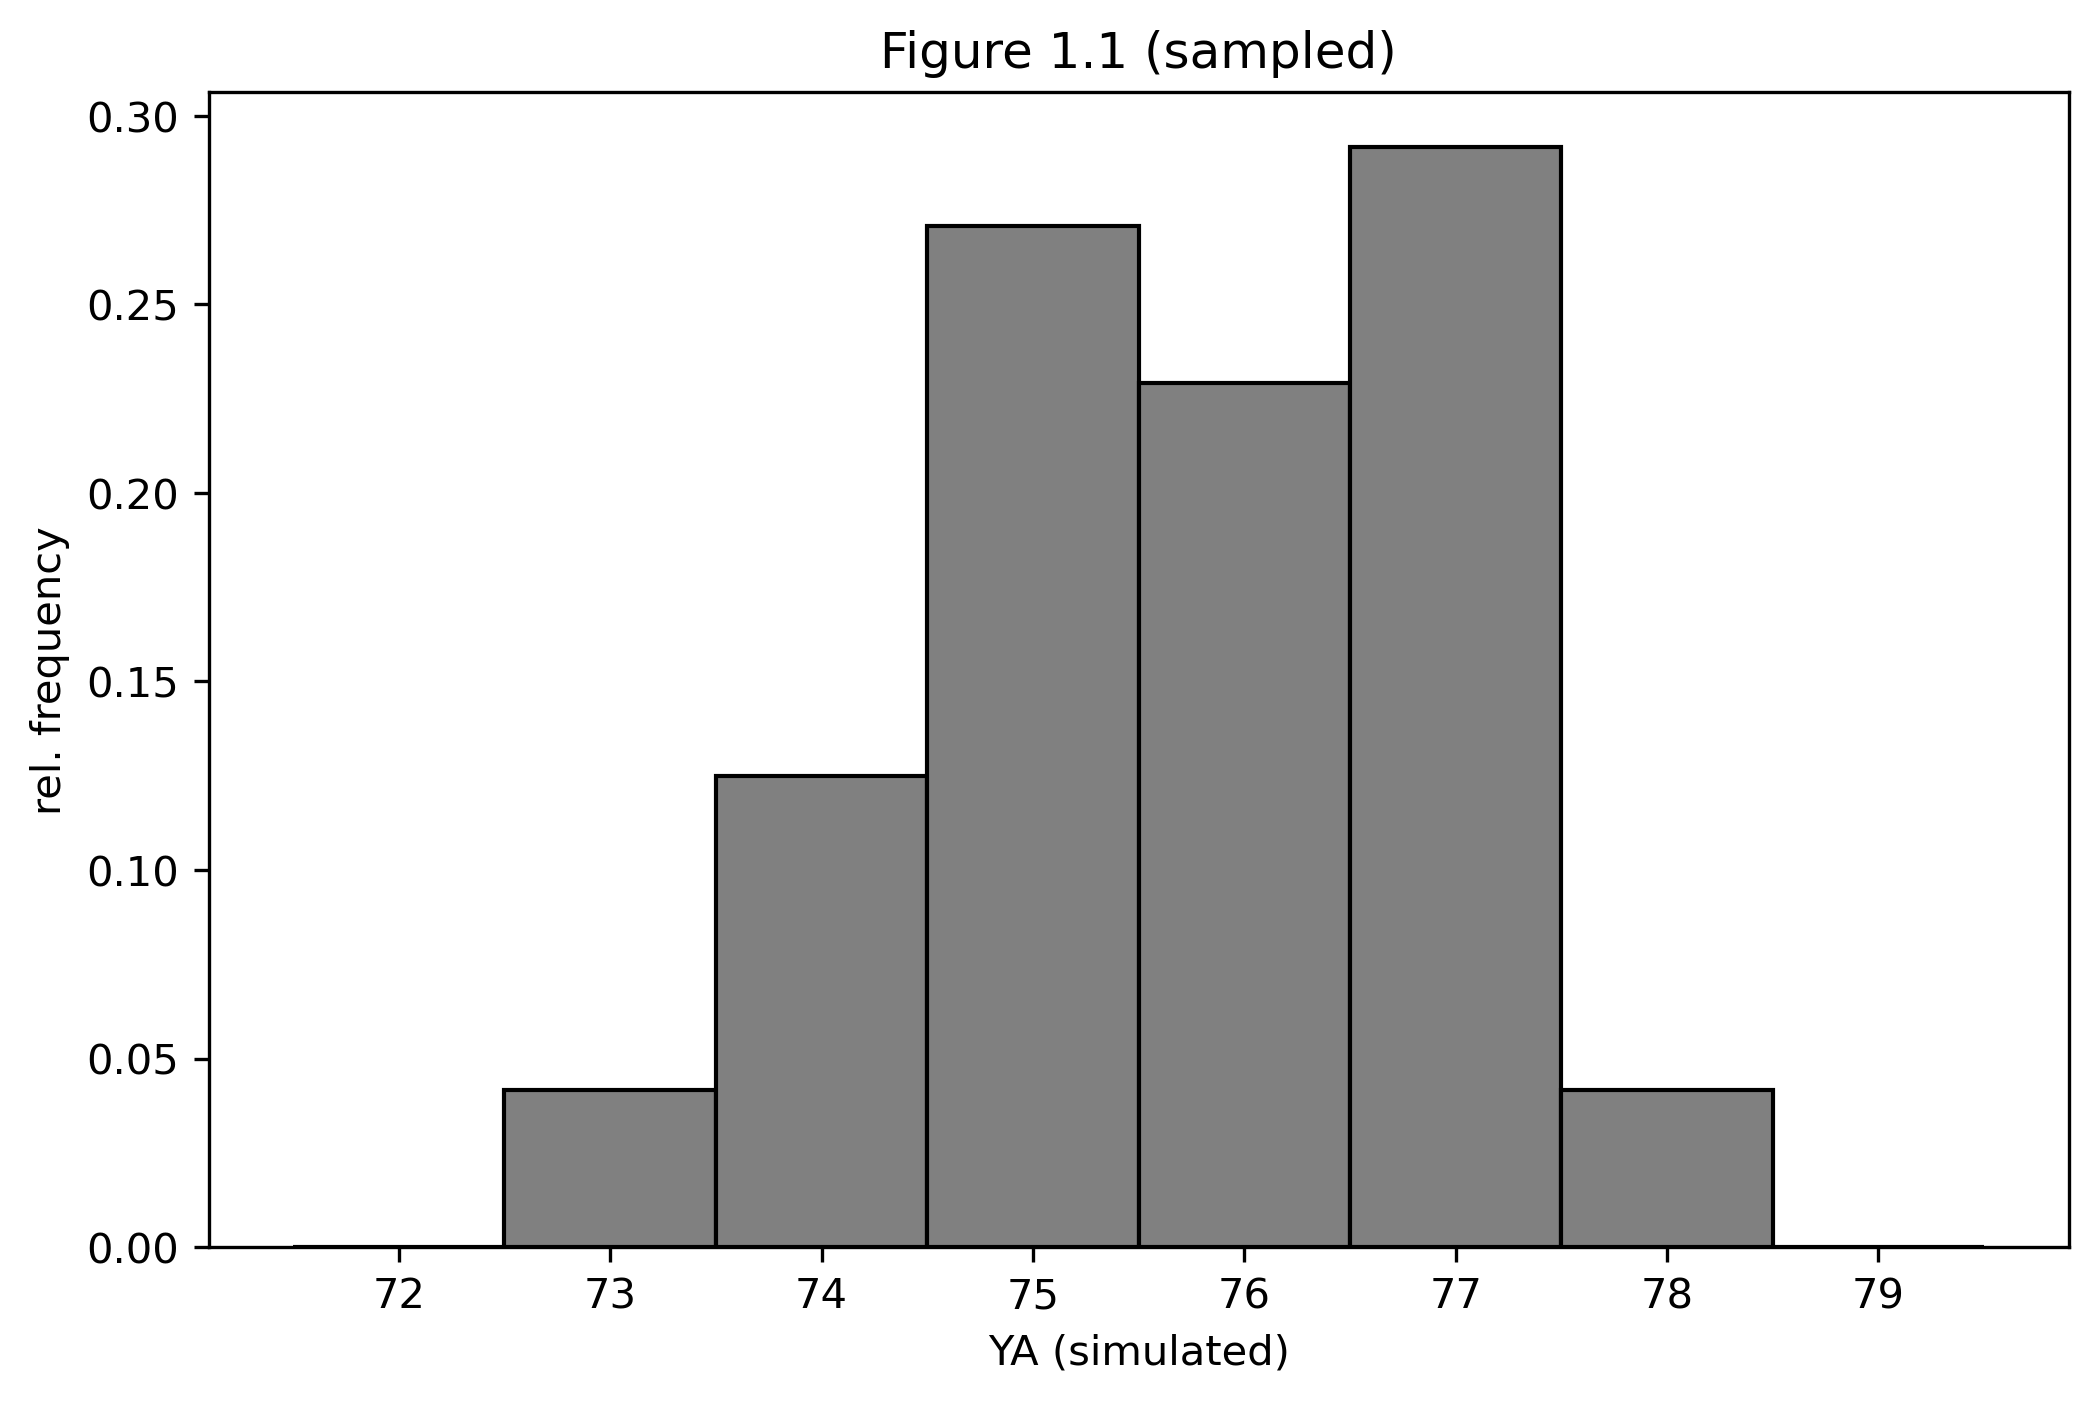

In [5]:
fig, ax = plt.subplots(figsize=(8,5), dpi=300)

ax.hist(a_50, bins=bins, facecolor='grey', edgecolor='black', density=True)
ax.set(xlabel='YA (simulated)', ylabel='rel. frequency', title='Figure 1.1 (sampled)');